# Branch and Bound - Musterlösungen

### 1.a) Spezifischer Wert vs. spezifisches Gewicht
Der spezifische Wert ist der Wert eines Gegenstands geteilt durch sein Gewicht. Er gibt an wie wertvoll eine Gewichtseinheit des Gegenstands ist. Das spezifische Gewicht ist das Gewicht geteilt durch den Wert und stellt das Gewicht einer Werteinheit dar. Die jeweiligen Quotienten verhalten sich zueinander umgekehrt proportional. Demnach spielt es keine Rolle welcher Quotient im Algorithmus verwendet wird.

$$
W_i = \frac{w_i}{g_i} >= W_{i+1} \Longleftrightarrow G_i = \frac{g_i}{w_i} <= G_{i+1}
$$

Bei der Implementation muss nur beachtet werden, dass **höhere** spezifische Werte ($W_i$) aber **niedrigere** spezifische Gewichte ($G_i$) bevorzugt werden. Da im vorgestellten Algorithmus eine Aufwärtssortierung implementiert ist, muss dort mit dem spezifischen Gewicht gearbeitet werden.

Der maximal erreichbare Rucksackwert für einen Teilrucksack kann ebenfalls mit beiden spezifischen Größen berechnet werden.

$$
m = r \cdot W_{k+1} + \sum_{i=1}^k x_i w_i = \frac{r}{G_{k+1}} + \sum_{i=1}^k x_i w_i
$$

Im vorgestellten Algorithmus wird die Priority-Queue mit `heapq` realisiert. Diese legt die Prioritäten immer aufsteigend fest. Da aber hier der Teilrucksack mit dem höheren Maximalwert priorisiert werden soll, muss der Kehrwert als Prioritätswert verwendet werden.


### 1.b) Sonderfälle beim 0/1 Rucksackproblem


In [88]:
import heapq # Priority Queue
def bnbKnapsack(items, K):
    # Sortierung der Gegenstände nach Gewicht pro Werteinheit (kleiner ist besser)
    sortedItems = sorted(items, key=lambda x: x[0] / x[1])
    print(sortedItems)
    bestKS = []  # [0,1,1,0] heißt das item1 und 2 enthalten sind und item0 und 3 nicht, anfangs leer
    # Hilfsfunktion zur Bestimmung des Rucksackwerts
    def ksValue(ks): return sum([sortedItems[i][1] if ks[i] == 1 else 0 for i in range(len(ks))])
    # Hilfsfunktion zur Bestimmung des Rucksackgewichts
    def ksWeight(ks): return sum([sortedItems[i][0] if ks[i] == 1 else 0 for i in range(len(ks))])
    # Hilfsfunktion zur Bestimmung des maximal erreichbaren Rucksackwerts
    def limit(ks): return ksValue(ks)+(K-ksWeight(ks))*sortedItems[len(ks)][1]/sortedItems[len(ks)][0]

    knapsacks = []  # die aktuellen Knoten, sortiert nach maximal erreichbarem Rucksackwert
    heapq.heappush(knapsacks, (1 / limit([]), []))  # Wurzel ist der leere Rucksack
    while len(knapsacks): # solange es Knoten zu prüfen gibt
        ks = heapq.heappop(knapsacks)[1]  # Knoten mit dem höchsten erreichbaren Rucksackwert als nächstes
        print("check:", ks)
        for x in [0,1]: # Expandieren zu 2 neuen Knoten
            expanded = ks + [x]
            print("expanded:", expanded, end=" ")
            if ksWeight(expanded) <= K:  # Kapazitätsgrenze noch nicht überschritten
                best = ksValue(bestKS) # momentan bester Rucksack
                if len(expanded) < len(sortedItems):  # noch kein vollständiger Rucksack
                    m = limit(expanded) # maximal zu erreichender Wert
                    if m > best:  # könnte ein besserer Rucksack erzielt werden?
                        heapq.heappush(knapsacks, (1 / m, expanded))
                        print("queued with max:", m, end=" ")
                    else:
                        print("bound", end=" ")
                if best < ksValue(expanded):  # besser?
                    bestKS = expanded
                    print("better")
                else:
                    print("")
            else:
                print("too heavy")
    return [sortedItems[i] for i in range(len(bestKS)) if bestKS[i]] 

In [89]:
print("NoItem-Result:",bnbKnapsack([(25, 9), (15, 5), (20, 6), (10,3)], 8))

[(25, 9), (15, 5), (20, 6), (10, 3)]
check: []
expanded: [0] queued with max: 2.6666666666666665 
expanded: [1] too heavy
check: [0]
expanded: [0, 0] queued with max: 2.4 
expanded: [0, 1] too heavy
check: [0, 0]
expanded: [0, 0, 0] queued with max: 2.4 
expanded: [0, 0, 1] too heavy
check: [0, 0, 0]
expanded: [0, 0, 0, 0] 
expanded: [0, 0, 0, 1] too heavy
NoItem-Result: []


Aufgrund der statischen Schranke, werden die zu schweren Gegenstände sofort ausgeschlossen. Nachdem alle Gegenstände geprüft wurden, steht fest, dass ein leerer Rucksack das Ergebnis ist. Nur $n$ Expandierungen sind notwendig.
***

In [90]:
print("AllItems-Result:",bnbKnapsack([(2,9), (2,6), (1,3), (3,5)], 8))

[(2, 9), (2, 6), (1, 3), (3, 5)]
check: []
expanded: [0] queued with max: 24.0 
expanded: [1] queued with max: 27.0 better
check: [1]
expanded: [1, 0] queued with max: 27.0 
expanded: [1, 1] queued with max: 27.0 better
check: [1, 0]
expanded: [1, 0, 0] queued with max: 19.0 
expanded: [1, 0, 1] queued with max: 20.333333333333336 
check: [1, 1]
expanded: [1, 1, 0] queued with max: 21.666666666666668 
expanded: [1, 1, 1] queued with max: 23.0 better
check: [0]
expanded: [0, 0] queued with max: 24.0 
expanded: [0, 1] queued with max: 24.0 
check: [0, 0]
expanded: [0, 0, 0] bound 
expanded: [0, 0, 1] bound 
check: [0, 1]
expanded: [0, 1, 0] bound 
expanded: [0, 1, 1] bound 
check: [1, 1, 1]
expanded: [1, 1, 1, 0] 
expanded: [1, 1, 1, 1] better
check: [1, 1, 0]
expanded: [1, 1, 0, 0] 
expanded: [1, 1, 0, 1] 
check: [1, 0, 1]
expanded: [1, 0, 1, 0] 
expanded: [1, 0, 1, 1] 
check: [1, 0, 0]
expanded: [1, 0, 0, 0] 
expanded: [1, 0, 0, 1] 
AllItems-Result: [(2, 9), (2, 6), (1, 3), (3, 5)]


Da jede Kombination eine potentielle Lösung darstellt, werden zu Beginn sehr viele Teil-Rucksäcke der Queue hinzugefügt. Durch die sehr ähnlichen spezifischen Werte wird erst relativ spät ein Teilsucksack gefunden, der eine so hohe Schranke definiert, dass ein Bound bei den Teilrucksäcken erfolgen kann, die nicht alle Gegenstände beinhalten. Es handelt sich um einen relativ ungünstigen Fall.
***

In [91]:
print("EqualItems-Result:",bnbKnapsack([(1,3), (2,6), (3,9), (4,12)], 8))

[(1, 3), (2, 6), (3, 9), (4, 12)]
check: []
expanded: [0] queued with max: 24.0 
expanded: [1] queued with max: 24.0 better
check: [0]
expanded: [0, 0] queued with max: 24.0 
expanded: [0, 1] queued with max: 24.0 better
check: [0, 0]
expanded: [0, 0, 0] queued with max: 24.0 
expanded: [0, 0, 1] queued with max: 24.0 better
check: [0, 0, 0]
expanded: [0, 0, 0, 0] 
expanded: [0, 0, 0, 1] better
check: [0, 0, 1]
expanded: [0, 0, 1, 0] 
expanded: [0, 0, 1, 1] better
check: [0, 1]
expanded: [0, 1, 0] queued with max: 24.0 
expanded: [0, 1, 1] queued with max: 24.0 
check: [0, 1, 0]
expanded: [0, 1, 0, 0] 
expanded: [0, 1, 0, 1] 
check: [0, 1, 1]
expanded: [0, 1, 1, 0] 
expanded: [0, 1, 1, 1] too heavy
check: [1]
expanded: [1, 0] queued with max: 24.0 
expanded: [1, 1] queued with max: 24.0 
check: [1, 0]
expanded: [1, 0, 0] queued with max: 24.0 
expanded: [1, 0, 1] queued with max: 24.0 
check: [1, 0, 0]
expanded: [1, 0, 0, 0] 
expanded: [1, 0, 0, 1] 
check: [1, 0, 1]
expanded: [1, 0, 1,

Haben alle Elemente den gleichen spezifischen Wert, ist das ebenfalls ein sehr ungünstiger Fall. Es wird stets der gleiche maximale Rucksackwert ermittelt. Die Priority-Queue wird damit wirkungslos und erst wenn zufällig die Lösung gefunden wird, kann ein Bound der übrigen Knoten erfolgen.
***

In [92]:
print("Diamond vs. Gold:",bnbKnapsack([(90,1000), (33,350), (33,350), (33,350)], 100))

[(90, 1000), (33, 350), (33, 350), (33, 350)]
check: []
expanded: [0] queued with max: 1060.6060606060605 
expanded: [1] queued with max: 1106.060606060606 better
check: [1]
expanded: [1, 0] queued with max: 1106.060606060606 
expanded: [1, 1] too heavy
check: [1, 0]
expanded: [1, 0, 0] queued with max: 1106.060606060606 
expanded: [1, 0, 1] too heavy
check: [1, 0, 0]
expanded: [1, 0, 0, 0] 
expanded: [1, 0, 0, 1] too heavy
check: [0]
expanded: [0, 0] queued with max: 1060.6060606060605 
expanded: [0, 1] queued with max: 1060.6060606060605 
check: [0, 0]
expanded: [0, 0, 0] queued with max: 1060.6060606060605 
expanded: [0, 0, 1] queued with max: 1060.6060606060605 
check: [0, 0, 0]
expanded: [0, 0, 0, 0] 
expanded: [0, 0, 0, 1] 
check: [0, 0, 1]
expanded: [0, 0, 1, 0] 
expanded: [0, 0, 1, 1] 
check: [0, 1]
expanded: [0, 1, 0] queued with max: 1060.6060606060605 
expanded: [0, 1, 1] queued with max: 1060.6060606060605 
check: [0, 1, 0]
expanded: [0, 1, 0, 0] 
expanded: [0, 1, 0, 1] 
ch

Der Diamant hat den höchsten spezifischen Wert, somit wird über diesen zuerst entschieden. Das Einpacken des Diamanten scheint günstiger zu sein, da beim theoretischen Auffüllen des übrigen Platzes mit Gold der höchste Rucksackwert zustande kommt. Erst nachdem festgestellt wurde, dass eine Hinzunahme von Goldmünzen nicht möglich ist, wird der richtige Weg verfolgt.

### 1.c) Priority-Queue
Eine Priority-Queue nimmt immer ein Paar aus Prioritätswert und zugehörigem Element auf und legt dieses sortiert in einer Liste ab. Durch entnehmen des ersten Elements der Priority-Queue kann das Element mit höchster Priorität (höchstem oder niedrigstem Prioritätswert) bezogen werden.

In [93]:
import math
# Hinzufügen zu Priority-Queue mittels Quicksort
def pqadd(pq, prioPair, start=None, until=None):
    if start == None or until == None: # Initialaufruf
        return pqadd(pq,prioPair,0,len(pq)) # Festlegung des Listenbereichs
    if start == until: # Zielposition gefunden
        return pq.insert(start, prioPair) # an dieser Stelle einfügen
    p = start + math.floor((until-start)/2) # Position in der Mitte
    if pq[p][0] > prioPair[0]: # hinterlegter Wert ist größer als der einzufügende
        return pqadd(pq,prioPair,start, p) # vor p weitersuchen
    elif pq[p][0] < prioPair[0]: # hinterlegter Wert ist kleiner
        return pqadd(pq,prioPair,p+1, until) # hinter p weitersuchen
    else: # gleicher Wert
        return pq.insert(p, prioPair) # an Ort und Stelle einfügen

# Entnahme eines Queue-Elements
def pqpop(pq, last=False): # last: vom Beginn oder vom Ende
    return pq.pop() if last else pq.pop(0)

def bnbKnapsackPQ(items, K):
    # Sortierung der Gegenstände nach Gewicht pro Werteinheit (kleiner ist besser)
    sortedItems = sorted(items, key=lambda x: x[0] / x[1])
    print(sortedItems)
    bestKS = []  # [0,1,1,0] heißt das item1 und 2 enthalten sind und item0 und 3 nicht, anfangs leer
    # Hilfsfunktion zur Bestimmung des Rucksackwerts
    def ksValue(ks): return sum([sortedItems[i][1] if ks[i] == 1 else 0 for i in range(len(ks))])
    # Hilfsfunktion zur Bestimmung des Rucksackgewichts
    def ksWeight(ks): return sum([sortedItems[i][0] if ks[i] == 1 else 0 for i in range(len(ks))])
    # Hilfsfunktion zur Bestimmung des maximal erreichbaren Rucksackwerts
    def limit(ks): return ksValue(ks)+(K-ksWeight(ks))*sortedItems[len(ks)][1]/sortedItems[len(ks)][0]

    knapsacks = []  # die aktuellen Knoten, sortiert nach maximal erreichbarem Rucksackwert
    pqadd(knapsacks, (limit([]), []))  # Wurzel ist der leere Rucksack
    while len(knapsacks): # solange es Knoten zu prüfen gibt
        ks = pqpop(knapsacks, True)[1]  # Knoten mit dem höchsten erreichbaren Rucksackwert als nächstes
        print("check:", ks)
        for x in [0,1]: # Expandieren zu 2 neuen Knoten
            expanded = ks + [x]
            print("expanded:", expanded, end=" ")
            if ksWeight(expanded) <= K:  # Kapazitätsgrenze noch nicht überschritten
                best = ksValue(bestKS) # momentan bester Rucksack
                if len(expanded) < len(sortedItems):  # noch kein vollständiger Rucksack
                    m = limit(expanded) # maximal zu erreichender Wert
                    if m > best:  # könnte ein besserer Rucksack erzielt werden?
                        pqadd(knapsacks, (m, expanded))
                        print("queued with max:", m, end=" ")
                    else:
                        print("bound", end=" ")
                if best < ksValue(expanded):  # besser?
                    bestKS = expanded
                    print("better")
                else:
                    print("")
            else:
                print("too heavy")
    return [sortedItems[i] for i in range(len(bestKS)) if bestKS[i]] 

bnbKnapsackPQ([(5, 9), (3, 5), (4, 6), (2,3)],8)

[(5, 9), (3, 5), (4, 6), (2, 3)]
check: []
expanded: [0] queued with max: 13.333333333333334 
expanded: [1] queued with max: 14.0 better
check: [1]
expanded: [1, 0] queued with max: 13.5 
expanded: [1, 1] queued with max: 14.0 better
check: [1, 1]
expanded: [1, 1, 0] bound 
expanded: [1, 1, 1] too heavy
check: [1, 0]
expanded: [1, 0, 0] bound 
expanded: [1, 0, 1] too heavy
check: [0]
expanded: [0, 0] bound 
expanded: [0, 1] bound 


[(5, 9), (3, 5)]

### 1.d) Dynamisches vs. statisches Bound

Ohne die dynamische Schranke wird ein expandierter Knoten immer der Priority-Queue hinzugefügt wenn die Kapazitätsgrenze noch nicht überschritten wurde. Die optimale Rucksackbelegung wird auch so gefunden. Aber der Algorithmus arbeitet weniger effizient.

In [98]:
def bnbKnapsackStatic(items, K):
    # Sortierung der Gegenstände nach Gewicht pro Werteinheit (kleiner ist besser)
    sortedItems = sorted(items, key=lambda x: x[0] / x[1])
    bestKS = []  # [0,1,1,0] heißt das item1 und 2 enthalten sind und item0 und 3 nicht, anfangs leer
    # Hilfsfunktion zur Bestimmung des Rucksackwerts
    def ksValue(ks): return sum([sortedItems[i][1] if ks[i] == 1 else 0 for i in range(len(ks))])
    # Hilfsfunktion zur Bestimmung des Rucksackgewichts
    def ksWeight(ks): return sum([sortedItems[i][0] if ks[i] == 1 else 0 for i in range(len(ks))])
    # Hilfsfunktion zur Bestimmung des maximal erreichbaren Rucksackwerts
    def limit(ks): return ksValue(ks)+(K-ksWeight(ks))*sortedItems[len(ks)][1]/sortedItems[len(ks)][0]

    knapsacks = []  # die aktuellen Knoten, sortiert nach maximal erreichbarem Rucksackwert
    heapq.heappush(knapsacks, (1 / limit([]), []))  # Wurzel ist der leere Rucksack
    while len(knapsacks): # solange es Knoten zu prüfen gibt
        ks = heapq.heappop(knapsacks)[1]  # Knoten mit dem höchsten erreichbaren Rucksackwert als nächstes
        for x in [0,1]: # Expandieren zu 2 neuen Knoten
            expanded = ks + [x]
            if ksWeight(expanded) <= K:  # Kapazitätsgrenze noch nicht überschritten
                best = ksValue(bestKS) # momentan bester Rucksack
                if len(expanded) < len(sortedItems):  # noch kein vollständiger Rucksack
                    m = limit(expanded) # maximal zu erreichender Wert
                    heapq.heappush(knapsacks, (1 / m, expanded))
                if best < ksValue(expanded):  # besser?
                    bestKS = expanded
    return [sortedItems[i] for i in range(len(bestKS)) if bestKS[i]] 

def bnbKnapsackDynamic(items, K):
    # Sortierung der Gegenstände nach Gewicht pro Werteinheit (kleiner ist besser)
    sortedItems = sorted(items, key=lambda x: x[0] / x[1])
    bestKS = []  # [0,1,1,0] heißt das item1 und 2 enthalten sind und item0 und 3 nicht, anfangs leer
    # Hilfsfunktion zur Bestimmung des Rucksackwerts
    def ksValue(ks): return sum([sortedItems[i][1] if ks[i] == 1 else 0 for i in range(len(ks))])
    # Hilfsfunktion zur Bestimmung des Rucksackgewichts
    def ksWeight(ks): return sum([sortedItems[i][0] if ks[i] == 1 else 0 for i in range(len(ks))])
    # Hilfsfunktion zur Bestimmung des maximal erreichbaren Rucksackwerts
    def limit(ks): return ksValue(ks)+(K-ksWeight(ks))*sortedItems[len(ks)][1]/sortedItems[len(ks)][0]

    knapsacks = []  # die aktuellen Knoten, sortiert nach maximal erreichbarem Rucksackwert
    heapq.heappush(knapsacks, (1 / limit([]), []))  # Wurzel ist der leere Rucksack
    while len(knapsacks): # solange es Knoten zu prüfen gibt
        ks = heapq.heappop(knapsacks)[1]  # Knoten mit dem höchsten erreichbaren Rucksackwert als nächstes
        for x in [0,1]: # Expandieren zu 2 neuen Knoten
            expanded = ks + [x]
            if ksWeight(expanded) <= K:  # Kapazitätsgrenze noch nicht überschritten
                best = ksValue(bestKS) # momentan bester Rucksack
                if len(expanded) < len(sortedItems):  # noch kein vollständiger Rucksack
                    m = limit(expanded) # maximal zu erreichender Wert
                    if m > best:  # könnte ein besserer Rucksack erzielt werden?
                        heapq.heappush(knapsacks, (1 / m, expanded))
                if best < ksValue(expanded):  # besser?
                    bestKS = expanded
    return [sortedItems[i] for i in range(len(bestKS)) if bestKS[i]] 


[(5, 9), (3, 5)]

Die Generierung von Gegenständen kann sehr einfach erfolgen indem Werte und Gewichte zufällig generiert werden. Eine sinnvolle Kapazitätsgrenze ist stets etwas kleiner als das Gesamtgewicht aller Gegenstände.

In [117]:
import random

def generateKnapsackParameters(n):
    sumw = 0 # Summe aller generierten Gewichte
    items = [] # generierte Gegenstände
    for i in range(n):
        value = random.randint(1,100)
        weight = random.randint(1,100)
        sumw += weight
        items.append((weight,value))
    return (items, math.floor(sumw*0.8)) # Kapazität bei 80% des Gesamtgewichts

print(generateKnapsackParameters(4))


([(59, 82), (3, 36), (97, 87), (34, 38)], 154)


Damit die Laufzeiten vergleichbar sind, muss **dasselbe Problem durch beide Funktionen** gelöst werden. Um zu verlässlichen Werten zu gelangen, muss die Messung **mit verschiedenen Problemen wiederholt** werden. Durch Addition der gemessenen Zeiten ergeben sich die Testergebnisse.

In [121]:
import time

def runTest(alg1, alg2, n, numOfRuns):
    time1 = 0
    time2 = 0
    for i in range(numOfRuns):
        (items, K) = generateKnapsackParameters(n)
        tstart = time.time()
        res1 = alg1(items, K)
        time1 += time.time()-tstart
        tstart = time.time()
        res2 = alg2(items, K)
        time2 += time.time()-tstart
    return (time1, time2)

(static, dynamic) = runTest(bnbKnapsackStatic,bnbKnapsackDynamic, 10, 10)
print("Static:",static, "Dynamic:",dynamic)

Static: 0.14861440658569336 Dynamic: 0.012953519821166992


Beim eigentlichen Test werden nun die Zeiten für verschiedenen Problemgrößen gemessen. Grafisch gegenübergestellt zeigen sich deutlich die Vorteile der Verwendung von dynamischen Schranken.

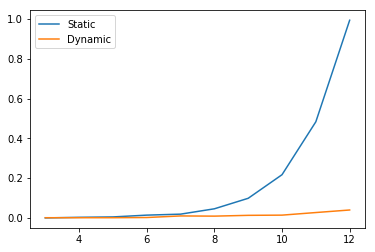

In [129]:
import matplotlib.pyplot as plt

sizes = []
tStatic = []
tDynamic = []
for n in range(3,13):
    (static, dynamic) = runTest(bnbKnapsackStatic,bnbKnapsackDynamic, n, 15)
    sizes.append(n)
    tStatic.append(static)
    tDynamic.append(dynamic)

ax = plt.axes()
ax.plot(sizes, tStatic, label="Static");
ax.plot(sizes, tDynamic, label="Dynamic");
l = ax.legend()


### 2.a) TSP - Modifizierung und Reduzierung

In [160]:
inf = float("inf")
distanceMatrix = [
    [inf, 20, 15, 10],
    [8, inf, 9, 8],
    [6, 12, inf, 13],
    [5, 10, 9, inf]
] # kürzeste Rundreise: 35

def delta(d):
    rd = [] # reduzierte Matrix
    s = len(d)
    delta = 0
    for row in range(s):
        rowmin = min(d[row]) # Zeilen-Minimum
        rd.append([d[row][i] - rowmin for i in range(s)]) # Zeile mit Differenzen
        delta += rowmin # Minima summieren
    for col in range(s):
        colmin = min([rd[i][col] for i in range(s)]) # Spalten-Minimum der Differenzen
        delta += colmin # Fehler addieren
    return (rd, delta)

def modify(d, fromP, toP):
    m = [] # modifizierte Matrix
    s = len(d)
    for row in range(s): m.append(d[row].copy()) # Kopie
    for row in range(s): # Wege zu toP = unendlich
        if row != fromP: m[row][toP] = inf
    for col in range(s): # Wege von fromP unendlich
        if col != toP: m[fromP][col] = inf
    m[toP][fromP] = inf # Weg zurück unendlich
    return m

def printMatrix(name, m):
    print("---------------------------------------------------------------")
    rd = delta(m)
    print(name,rd[1])
    for i in range(len(m)):
        print('\t'.join(map(str,m[i])),"\t|",'\t'.join(map(str,rd[0][i])))

printMatrix("Root:",distanceMatrix)
m01 = modify(distanceMatrix,0,1)
m02 = modify(distanceMatrix,0,2)
m03 = modify(distanceMatrix,0,3)
printMatrix("0 >> 1:",m01)
printMatrix("0 >> 2:",m02)
printMatrix("0 >> 3:",m03)

m12 = modify(m01,1,2)
m13 = modify(m01,1,3)
m21 = modify(m02,2,1)
m23 = modify(m02,2,3)
m31 = modify(m03,3,1)
m32 = modify(m03,3,2)
printMatrix("0 >> 1 >> 2:",m12)
printMatrix("0 >> 1 >> 3:",m13)
printMatrix("0 >> 2 >> 1:",m21)
printMatrix("0 >> 2 >> 3:",m23)
printMatrix("0 >> 3 >> 1:",m31)
printMatrix("0 >> 3 >> 2:",m32)

---------------------------------------------------------------
Root: 35
inf	20	15	10 	| inf	10	5	0
8	inf	9	8 	| 0	inf	1	0
6	12	inf	13 	| 0	6	inf	7
5	10	9	inf 	| 0	5	4	inf
---------------------------------------------------------------
0 >> 1: 40
inf	20	inf	inf 	| inf	0	inf	inf
inf	inf	9	8 	| inf	inf	1	0
6	inf	inf	13 	| 0	inf	inf	7
5	inf	9	inf 	| 0	inf	4	inf
---------------------------------------------------------------
0 >> 2: 40
inf	inf	15	inf 	| inf	inf	0	inf
8	inf	inf	8 	| 0	inf	inf	0
inf	12	inf	13 	| inf	0	inf	1
5	10	inf	inf 	| 0	5	inf	inf
---------------------------------------------------------------
0 >> 3: 34
inf	inf	inf	10 	| inf	inf	inf	0
8	inf	9	inf 	| 0	inf	1	inf
6	12	inf	inf 	| 0	6	inf	inf
inf	10	9	inf 	| inf	1	0	inf
---------------------------------------------------------------
0 >> 1 >> 2: 47
inf	20	inf	inf 	| inf	0	inf	inf
inf	inf	9	inf 	| inf	inf	0	inf
6	inf	inf	13 	| 0	inf	inf	7
5	inf	inf	inf 	| 0	inf	inf	inf
--------------------------------------------------------

### 2.b) Lösung bei nicht zusammenhängenden Graphen

Wenn alle Knoten des Teilgraphen mit dem Startknoten beschritten wurden, sind keine weiteren Übergänge möglich. Somit können keine weiteren Modifikationen mehr vorgenommen und keine weiteren Möglichkeiten der Priority-Queue hinzugefügt werden. Die Queue wird so gelehrt ohne das innere `return` zu erreichen. Das Ergebnis ist, dass keine Rundreise existiert.

In [166]:
distanceMatrix = [
    [inf, 20, 4, inf, inf],
    [8, inf, 12, inf, inf],
    [22, 6, inf, inf, inf],
    [inf, inf, inf, inf, 9],
    [inf, inf, inf, 10 ,inf]
] # 0,1,2 und 3,4 sind nicht zusammenhängend

printMatrix("Root:",distanceMatrix)
m01 = modify(distanceMatrix,0,1)
printMatrix("0 >> 1:",m01)
m02 = modify(distanceMatrix,0,2)
printMatrix("0 >> 2:",m02)

m012 = modify(m01,1,2)
printMatrix("0 >> 1 >> 2:",m012)
m021 = modify(m02,2,1)
printMatrix("0 >> 2 >> 1:",m021)

---------------------------------------------------------------
Root: 37
inf	20	4	inf	inf 	| inf	16	0	inf	inf
8	inf	12	inf	inf 	| 0	inf	4	inf	inf
22	6	inf	inf	inf 	| 16	0	inf	inf	inf
inf	inf	inf	inf	9 	| inf	inf	inf	inf	0
inf	inf	inf	10	inf 	| inf	inf	inf	0	inf
---------------------------------------------------------------
0 >> 1: 73
inf	20	inf	inf	inf 	| inf	0	inf	inf	inf
inf	inf	12	inf	inf 	| inf	inf	0	inf	inf
22	inf	inf	inf	inf 	| 0	inf	inf	inf	inf
inf	inf	inf	inf	9 	| inf	inf	inf	inf	0
inf	inf	inf	10	inf 	| inf	inf	inf	0	inf
---------------------------------------------------------------
0 >> 2: 37
inf	inf	4	inf	inf 	| inf	inf	0	inf	inf
8	inf	inf	inf	inf 	| 0	inf	inf	inf	inf
inf	6	inf	inf	inf 	| inf	0	inf	inf	inf
inf	inf	inf	inf	9 	| inf	inf	inf	inf	0
inf	inf	inf	10	inf 	| inf	inf	inf	0	inf
---------------------------------------------------------------
0 >> 1 >> 2: 73
inf	20	inf	inf	inf 	| inf	0	inf	inf	inf
inf	inf	12	inf	inf 	| inf	inf	0	inf	inf
22	inf	inf	inf	inf 	| 0	inf	inf	i

### 2.c) Lösung bei Graphen wo eine Rundreise nicht möglich ist

In einem solchen Fall ist es durchaus möglich, dass der Graph zusammenhängend ist. Aber wenn es *Sackgassen* gibt, dann fehlt der Weg zurück zum Ausgangspunkt. Der Algorithmus kann hier also das innere `return` erreichen, wenn es einen Weg gibt bei dem alle Knoten beschritten werden. Da es sich um eine Rundreise handelt, muss aber auch der Weg zum Ausgangspunkt mit einbezogen werden. Dieser Restweg ist in der theoretisch erreichbaren Mindestweglänge enthalten, dem Prioritätswert der Priority-Queue. Dieser wiederum wird nach der letzten Modifikation berechnet. Gibt es vom letzten Knoten keine Verbindung zum Ausgangspunkt, so befinden sich in der entsprechenden Zeile nur unendlich große Werte. Das Zeilenminimum ist damit unendlich groß wodurch auch die Mindestweglänge unendlich groß wird.

In diesem Beispielprogramm weist also die Ausgabe einer *unendlich langen Rundreise* darauf hin, dass keine Rundreise existiert.

In [171]:
distanceMatrix = [
    [inf, 20, 4, inf, inf],
    [8, inf, 12, inf, inf],
    [22, 6, inf, inf, 11],
    [inf, inf, inf, inf, 9],
    [inf, inf, inf, 10 ,inf]
] # 0,1,2 und 3,4 sind nur durch 2 >> 4 verbunden, keine Rundreise möglich

def bnb_TSP(d):
    s = len(d)
    routes = []
    heapq.heappush(routes, (0, ([0], d)))
    while len(routes):
        node = heapq.heappop(routes) # Knoten mit dem niedrigsten delta
        item = node[1]
        print("check:",item[0], node[0])
        if len(item[0]) == s: # kürzester Weg ist vollständig
            printMatrix("Result:",item[1])
            return (item[0]+[item[0][0]], node[0])
        last = item[0][-1] # zuletzt besuchter Knoten
        matrix = item[1] # Ausgangsmatrix
        for x in range(s):
            # für jeden noch nicht besuchten Knoten der nicht unendlich weit weg ist
            if x in item[0] or matrix[last][x] == inf: continue
            m = modify(matrix, last, x) # Matrix modifizieren
            dt = delta(m)[1] # theoretisch erreichbare Mindestweglänge
            print("  extract:", item[0]+[x], dt)
            heapq.heappush(routes, (dt, (item[0]+[x], m))) # in Priority Queue einordnen
    return "no route"

print(bnb_TSP(distanceMatrix))

check: [0] 0
  extract: [0, 1] 73
  extract: [0, 2] 37
check: [0, 2] 37
  extract: [0, 2, 1] 37
  extract: [0, 2, 4] inf
check: [0, 2, 1] 37
check: [0, 1] 73
  extract: [0, 1, 2] 73
check: [0, 1, 2] 73
  extract: [0, 1, 2, 4] inf
check: [0, 1, 2, 4] inf
  extract: [0, 1, 2, 4, 3] inf
check: [0, 1, 2, 4, 3] inf
---------------------------------------------------------------
Result: inf
inf	20	inf	inf	inf 	| inf	0	inf	inf	inf
inf	inf	12	inf	inf 	| inf	inf	0	inf	inf
inf	inf	inf	inf	11 	| inf	inf	inf	inf	0
inf	inf	inf	inf	inf 	| nan	nan	nan	nan	nan
inf	inf	inf	10	inf 	| inf	inf	inf	0	inf
([0, 1, 2, 4, 3, 0], inf)


### 3. Golomb-Lineal mittels Branch and Bound

Ein Golomb-Lineal der Ordnung $n$ umfasst immer die Marken $m_1$ bis $m_n$. Es gilt $m_1 = 0$ und $m_i < m_{i+1}$ mit $m_i \in \mathbb{N}$. Desweiteren sind alle Differenzen zwischen den Marken eindeutig. Ein Golomb-Lineal ist optimal, wenn $m_n$ minimal ist. Der Wert $m_n$ gilt als die Länge des Golomb-Lineals.

Als Datenstruktur kann z.B. ein Array der Maximalgröße $n$ verwendet werden, wobei jeder Index für eine Marke des Lineals steht und der Wert am Index den jeweilen Markierungswert repräsentiert.

Der Suchbaum könnte nun mit dem Array [0] beginnen. In jeder Expansionsebene wird das Array um eine Marke erweitert. Im ersten Schritt entstehen z.B. [0,1], [0,2] und [0,3]. Im nächsten Schritt dann z.B. [0,1,3], [0,1,4], [0,2,3] und [0,2,5]. Nach $n-1$ Erweiterungen sind die Arrays komplett und stellen vollständige Golomb-Lineale der Ordnung $n$ dar.

Zunächst kann es einige statische Begrenzungen geben. Der Wert einer hinzuzufügenden Markeriungen muss größer sein als der Wert der vorherigen Markeriung und kann maximal $n^2$ sein. Ein Wert kann nur dann angehängt werden, wenn der Abstand zu allen anderen Markierungen noch nicht *vergeben* ist.

Eine dynamische Begrenzung kann realisiert werden, indem für ein Teil-Lineal berechnet wird, welche Länge es nach Fertigstellung mindestens haben muss. Wie immer bei Branch and Bound geht es dabei vordergründig nicht darum, diese Mindestlänge möglichst genau zu berechnen, sondern dies möglichst effizient zu tun.

Die Mindestlänge eines Teil-Lineals kann nun verwendet werden, um es anderen Teil-Linealen gegenüberzustellen. Das wiederum kann durch eine Priority-Queue realisiert werden. Teil-Lineale mit der geringsten Mindestlänge werden dann bevorzugt behandelt (expandiert). Das Bound erfolgt passiv indem schlechtere Teillösungen verzögert werden.

In [175]:
import heapq

def minLength(ruler, n): # Mindestlänge eines Lineals der Länge n
    k = n-len(ruler) # k noch nicht besetze Stellen
    return ruler[-1] + k * (k+1) // 2 # aktuelle Länge + 1+2+...+k (Gaußsche Summenformel)

def validRuler(ruler): # Ist das Lineal gültig
    diff = set() # Differenzen
    for i in ruler: # für jede Markierung
        for j in ruler: # und jede Markierung davor
            if i == j: break
            d = i - j # Differenz berechnen
            if d in diff: # gibt es diese Differenz schon?
                return False # nicht gültig
            diff.add(d) # Differenz merken
    return True # alle Differenzen eindeutig

def golomb(n):
    maxpos = n * n + 1 # optimale Länge stets < n^2
    rulers = [] # Priority-queue
    heapq.heappush(rulers, (0, [0]))  # Wurzelknoten
    while len(rulers):
        (minLen, ruler) = heapq.heappop(rulers) # momentan beste Teillösung
        if len(ruler) == n:  # vollständig?
            return (minLen,ruler) # Lösung, da es kein kleiners minLen gibt
        for pos in range(ruler[-1] + 1, maxpos):  # die nächstgrößeren Positionen
            newruler=ruler + [pos]  # Lineal erweitern
            if validRuler(newruler):  # gültiges Lineal >> in Priority-Queue
                heapq.heappush(rulers, (minLength(newruler, n), newruler))
    return None

for i in range(1, 8):
    print(i, golomb(i))

1 (0, [0])
2 (1, [0, 1])
3 (3, [0, 1, 3])
4 (6, [0, 1, 4, 6])
5 (11, [0, 1, 4, 9, 11])
6 (17, [0, 1, 4, 10, 12, 17])
7 (25, [0, 1, 4, 10, 18, 23, 25])
